# 1. CLEANING THE DATA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
stats = ['pts', 'min','fgm','fga','fg3m','fg3a','ftm','oreb','dreb','ast','stl','tov','blk']


In [5]:
df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_general_traditional_per_game_data.csv")

In [6]:
df.head()

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0


In [7]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [8]:
filtered_df = df.dropna(how = 'all')

In [9]:
filtered_df['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

<Axes: >

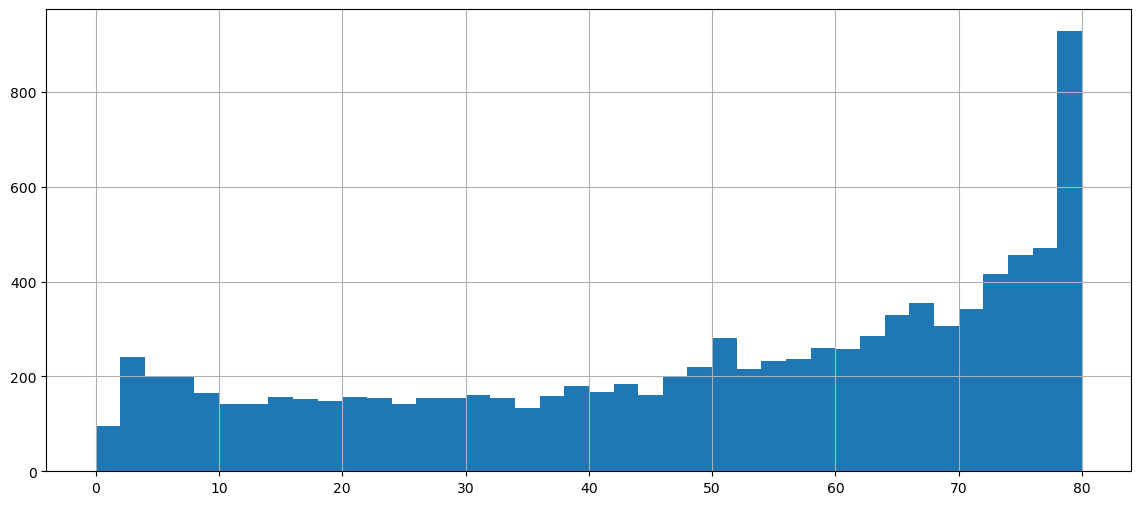

In [10]:
bin_values = np.arange(start = 0 , stop = 82, step = 2)
filtered_df['gp'].hist(bins=bin_values, figsize = [14,6] )

### Filter out players who have not played more than 10 games. 


In [11]:
min_gp = 10
cleaned_df = filtered_df[filtered_df['gp'] > 10]
cleaned_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8
10,947,1996-97,76.0,22.0,41.1,8.2,19.8,0.416,2.0,6.0,...,5.0,7.2,0.702,1.5,2.6,7.5,4.4,2.1,0.3,23.5


In [12]:
z = cleaned_df[cleaned_df['pts'] == 1.0]
z.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
1225,1594,1998-99,17.0,27.0,5.3,0.4,1.2,0.286,0.0,0.3,...,0.3,1.1,0.278,0.2,0.4,1.1,0.7,0.5,0.0,1.0
2652,1043,2002-03,11.0,29.0,6.3,0.4,1.5,0.235,0.0,0.0,...,0.3,0.4,0.750,0.6,1.4,0.5,0.2,0.3,0.1,1.0
2785,1915,2002-03,17.0,28.0,8.0,0.4,1.1,0.368,0.0,0.0,...,0.2,0.2,0.750,0.6,1.1,0.4,0.4,0.6,0.4,1.0
2943,2071,2002-03,27.0,22.0,5.3,0.4,0.9,0.435,0.0,0.0,...,0.3,0.4,0.636,0.4,1.5,0.2,0.2,0.2,0.1,1.0
3136,685,2003-04,12.0,31.0,4.9,0.3,0.8,0.400,0.0,0.0,...,0.3,0.5,0.667,0.3,0.5,0.1,0.2,0.0,0.3,1.0
3415,2425,2003-04,32.0,24.0,7.9,0.3,1.0,0.273,0.0,0.0,...,0.4,1.0,0.452,0.7,1.0,0.4,0.3,0.4,0.1,1.0
3603,2788,2004-05,15.0,24.0,3.8,0.4,0.9,0.429,0.0,0.0,...,0.2,0.3,0.750,0.2,0.3,0.0,0.3,0.0,0.3,1.0
3620,1032,2004-05,47.0,31.0,5.5,0.4,0.8,0.459,0.0,0.0,...,0.3,0.7,0.387,0.4,0.3,0.1,0.2,0.1,0.1,1.0
3624,2205,2004-05,39.0,23.0,7.8,0.5,1.8,0.290,0.0,0.1,...,0.0,0.1,0.000,0.8,1.0,0.4,0.3,0.2,0.7,1.0
4114,101204,2005-06,14.0,23.0,6.2,0.3,0.7,0.400,0.0,0.0,...,0.4,0.9,0.462,0.7,1.5,0.1,0.2,0.1,0.2,1.0


### Check how many players were filtered 

In [13]:
x = filtered_df['player_id'].count()
y = cleaned_df['player_id'].count()
print(x-y)

971


# 2. Checking for the change in league averages 

In [14]:
league_data = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\league_averages.csv", skiprows = 1)
league_data_20 = league_data.iloc[:21]
league_averages = league_data_20[['Season','ORtg']]
league_averages = league_averages.iloc[::-1].reset_index(drop=True)
league_averages.head()


,Season,ORtg
0,2003-04,102.9
1,2004-05,106.1
2,2005-06,106.2
3,2006-07,106.5
4,2007-08,107.5


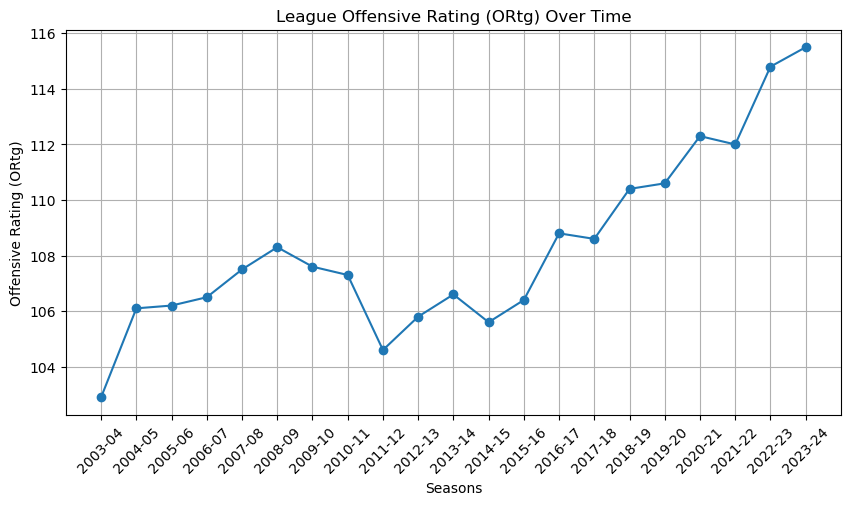

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(league_averages['Season'], league_averages['ORtg'], marker='o') # Add markers for each point
plt.title('League Offensive Rating (ORtg) Over Time')
plt.xlabel('Seasons') # You might want to replace this with the actual season labels if available
plt.ylabel('Offensive Rating (ORtg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. NORMALISING THE DATA

In [16]:
season = cleaned_df['season_id'] == '2017-18'
df_2018 = cleaned_df[season]
df_2018.head()

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9563,201166,2017-18,32.0,33.0,5.9,0.9,2.2,0.406,0.3,1.0,...,0.3,0.3,0.727,0.2,0.3,0.6,0.3,0.2,0.0,2.3
9564,203932,2017-18,58.0,22.0,32.9,6.5,14.9,0.434,2.0,5.9,...,2.7,3.9,0.698,1.5,6.4,2.3,1.8,1.0,0.8,17.6
9567,1627846,2017-18,48.0,24.0,10.9,1.0,3.1,0.336,0.5,1.4,...,0.5,0.8,0.590,0.3,1.2,0.5,0.7,0.3,0.2,3.0
9569,201143,2017-18,72.0,32.0,31.6,5.1,10.5,0.489,1.3,3.1,...,1.3,1.7,0.783,1.4,5.9,4.7,1.8,0.6,1.1,12.9
9570,2744,2017-18,36.0,33.0,13.4,3.1,5.8,0.534,0.0,0.1,...,0.8,1.0,0.833,0.8,3.1,0.8,0.6,0.4,0.6,7.0


In [17]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\2213054474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [18]:
df_2018.sort_values('pts_norm', ascending = False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


#### This step allows us to compare the value of scoring x amount of points in different years

### We are going to this for all the stats we want to normalise

In [19]:
def normalise(col):
    return (col-col.min())/(col.max() - col.min())

In [20]:
col_to_normalise =  ['pts', 'min','fgm','fga','fg3m','fg3a','ftm','oreb','dreb','ast','stl','tov','blk']

In [21]:
def vorp(df):
    for col_name in col_to_normalise:
        df['{}_norm'.format(col_name)] = normalise(df[col_name])
    return df

In [22]:
vorp(df_2018)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\2346260935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalise(df[col_name])
C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\2346260935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalise(df[col_name])
C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\2346260935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fga_norm,fg3m_norm,fg3a_norm,ftm_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9563,201166,2017-18,32.0,33.0,5.9,0.9,2.2,0.406,0.3,1.0,...,0.078049,0.071429,0.10,0.034483,0.039216,0.009346,0.058252,0.083333,0.06,0.000000
9564,203932,2017-18,58.0,22.0,32.9,6.5,14.9,0.434,2.0,5.9,...,0.697561,0.476190,0.59,0.310345,0.294118,0.579439,0.223301,0.416667,0.36,0.307692
9567,1627846,2017-18,48.0,24.0,10.9,1.0,3.1,0.336,0.5,1.4,...,0.121951,0.119048,0.14,0.057471,0.058824,0.093458,0.048544,0.125000,0.14,0.076923
9569,201143,2017-18,72.0,32.0,31.6,5.1,10.5,0.489,1.3,3.1,...,0.482927,0.309524,0.31,0.149425,0.274510,0.532710,0.456311,0.250000,0.36,0.423077
9570,2744,2017-18,36.0,33.0,13.4,3.1,5.8,0.534,0.0,0.1,...,0.253659,0.000000,0.01,0.091954,0.156863,0.271028,0.077670,0.166667,0.12,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.185366,0.119048,0.17,0.045977,0.137255,0.233645,0.077670,0.125000,0.18,0.192308
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,0.692683,0.428571,0.51,0.413793,0.078431,0.308411,0.291262,0.416667,0.36,0.076923
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,0.600000,0.214286,0.25,0.160920,0.313725,0.457944,0.213592,0.291667,0.40,0.076923
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.156098,0.000000,0.00,0.126437,0.254902,0.299065,0.155340,0.250000,0.20,0.076923


In [23]:
grouped = cleaned_df.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [24]:
df_new = cleaned_df.groupby(['season_id']).apply(vorp)
df_new.head(10)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\2772359607.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_new = cleaned_df.groupby(['season_id']).apply(vorp)


,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fga_norm,fg3m_norm,fg3a_norm,ftm_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,0.127753,0.071429,0.090909,0.156250,0.118644,0.16,0.122807,0.074074,0.181818,0.088235
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,0.237885,0.000000,0.025974,0.234375,0.457627,0.50,0.070175,0.296296,0.204545,0.058824
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,0.176211,0.178571,0.155844,0.171875,0.084746,0.20,0.166667,0.333333,0.250000,0.088235
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,0.180617,0.000000,0.000000,0.156250,0.322034,0.23,0.043860,0.185185,0.227273,0.264706
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,0.149780,0.000000,0.012987,0.171875,0.118644,0.11,0.035088,0.111111,0.159091,0.176471
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,0.096916,0.000000,0.000000,0.171875,0.203390,0.21,0.043860,0.185185,0.159091,0.058824
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.070485,0.000000,0.000000,0.078125,0.220339,0.22,0.026316,0.148148,0.136364,0.058824
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,0.220264,0.000000,0.000000,0.234375,0.271186,0.21,0.070175,0.259259,0.227273,0.058824
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,0.541850,0.642857,0.610390,0.343750,0.084746,0.22,0.192982,0.185185,0.477273,0.058824
10,947,1996-97,76.0,22.0,41.1,8.2,19.8,0.416,2.0,6.0,...,0.854626,0.714286,0.779221,0.781250,0.254237,0.24,0.657895,0.777778,1.000000,0.088235


# 4. DISTANCE FUNCTION

### This function helps find how similar players are

In [25]:
def cal_distance(u,v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

In [26]:
df1 = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_id_player_name.csv")

df2 = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_general_traditional_per_game_data.csv", usecols = ['player_id', 'season_id','pts'])

df3 = pd.merge(df1, df2, on='player_id', how='left')

In [27]:
df3.head()

,player_id,player_name,season_id,pts
0,1627773,AJ Hammons,2016-17,2.2
1,201166,Aaron Brooks,2007-08,5.2
2,201166,Aaron Brooks,2008-09,11.2
3,201166,Aaron Brooks,2009-10,19.6
4,201166,Aaron Brooks,2010-11,10.7


In [28]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [29]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [30]:
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]


In [31]:
cal_distance(dame_ppg, curry_ppg)

1.5

In [32]:
cal_distance(dame_ppg, rudy_ppg)

9.9

# 5. FIND PLAYER FUNCTION

In [33]:
df_example = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_general_traditional_per_game_data.csv", header = 0)
df_example.head()

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0


In [34]:
def find_player(df, player_id, season_id):
    for row in df.itertuples():
        if season_id == row.season_id and player_id == row.player_id:
            return row

In [35]:
find_player(df_example, 471, '1996-97' )

Pandas(Index=0, player_id=471, season_id='1996-97', gp=41.0, age=nan, min=13.3, fgm=1.1, fga=3.3, fg_pct=0.331, fg3m=0.2, fg3a=0.7, fg3_pct=0.233, ftm=1.0, fta=1.2, ft_pct=0.875, oreb=0.7, dreb=1.8, ast=1.4, tov=0.8, stl=0.2, blk=0.3, pts=3.4)

# 6. CALCULATING PLAYER SIMILARITY

In [36]:
current_player_season = '2016-17'
current_player_id = 201950

In [37]:
# read in per game data from csv folder
df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_general_traditional_per_game_data.csv", header = 0)

df_cleaned = df.dropna(how='all')

min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]




In [38]:
cols_to_norm = ['pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk']

In [39]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalise(df[col_name])
    return df

In [40]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\1214020351.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_norm = df_filter.groupby(['season_id']).apply(vorp)


In [41]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['season_id'] == current_player_season), 
             'pts_norm']).item()

jrue_pts_norm

0.474025974025974

In [42]:
current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
]

In [43]:
current_player_vector = np.array(current_player_stats)

In [44]:
print(current_player_vector)

[0.47402597 0.85302594 0.57425743 0.5387931  0.36585366 0.42
 0.19565217 0.2293578  0.1627907  0.30693069 0.64864865 0.75
 0.5        0.26923077]


In [45]:
compared_player_season = '2013-14'
compared_player_id = 203077

In [46]:
compared_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item()
]

In [47]:
compared_player_vector = np.array(compared_player_stats)

In [48]:
print(compared_player_vector)

[0.21766562 0.59833795 0.25       0.25       0.         0.01265823
 0.20689655 0.3030303  0.33333333 0.35106383 0.07476636 0.28
 0.24324324 0.21428571]


In [49]:
vfunc = np.vectorize(cal_distance)
distance_vect = vfunc(current_player_vector, compared_player_vector)
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [50]:
number = np.sum(np.abs(distance_vect)) / len(distance_vect)
number

0.25374793324911765

# 7. Comparing Multiple Players in a For Loop

In [51]:
player_distances = []

In [52]:
display(df_norm)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,0.071429,0.090909,0.156250,0.127660,0.118644,0.160000,0.122807,0.074074,0.181818,0.088235
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,0.000000,0.025974,0.234375,0.255319,0.457627,0.500000,0.070175,0.296296,0.204545,0.058824
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,0.178571,0.155844,0.171875,0.138298,0.084746,0.200000,0.166667,0.333333,0.250000,0.088235
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,0.000000,0.000000,0.156250,0.159574,0.322034,0.230000,0.043860,0.185185,0.227273,0.264706
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,0.000000,0.012987,0.171875,0.191489,0.118644,0.110000,0.035088,0.111111,0.159091,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.156863,0.159091,0.082474,0.081818,0.037037,0.118182,0.177570,0.227273,0.120000,0.037037
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.019608,0.083333,0.051546,0.063636,0.055556,0.154545,0.046729,0.136364,0.080000,0.037037
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,0.098039,0.121212,0.123711,0.145455,0.259259,0.245455,0.084112,0.136364,0.200000,0.333333
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,0.372549,0.386364,0.515464,0.545455,0.111111,0.354545,0.420561,0.454545,0.680000,0.148148


In [97]:
for row in df_norm.itertuples():
    compared_player_vector = np.array([
    row.pts_norm,
    row.min_norm,
    row.fgm_norm,
    row.fga_norm,
    row.fg3m_norm,
    row.fg3a_norm,
    row.ftm_norm,
    row.fta_norm,
    row.oreb_norm,
    row.dreb_norm,
    row.ast_norm,
    row.stl_norm,
    row.tov_norm,
    row.blk_norm
    ])

    vfunc = np.vectorize(cal_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distances.append(number)
    player = row.player_id
    #print('Done with ' + str(player) + '. Percent error was ' + str(number))
    

In [54]:
len(player_distances)

9662

In [55]:
df_norm['distances'] = player_distances

In [56]:
ranked_df = df_norm.sort_values('distances')


In [57]:
display(ranked_df)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distances
9325,201950,2016-17,67.0,27.0,32.7,6.0,13.3,0.454,1.5,4.2,...,0.420000,0.195652,0.229358,0.162791,0.306931,0.648649,0.750000,0.500000,0.269231,0.000000
8368,201950,2014-15,40.0,25.0,32.6,6.0,13.4,0.446,1.3,3.4,...,0.419753,0.181818,0.186275,0.150943,0.250000,0.673267,0.695652,0.522727,0.206897,0.034340
6544,201144,2010-11,81.0,23.0,35.5,5.2,11.8,0.444,1.0,2.7,...,0.428571,0.289474,0.256410,0.088889,0.230769,0.570175,0.750000,0.564103,0.076923,0.055577
6472,201950,2010-11,82.0,21.0,35.4,5.4,12.2,0.446,1.0,2.7,...,0.428571,0.276316,0.213675,0.177778,0.278846,0.570175,0.625000,0.692308,0.153846,0.059292
10261,202339,2018-19,78.0,29.0,29.1,6.0,12.4,0.484,1.6,4.8,...,0.363636,0.237113,0.272727,0.203704,0.318182,0.514019,0.681818,0.420000,0.148148,0.061078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2228,2002-03,11.0,22.0,2.7,0.3,0.8,0.333,0.0,0.0,...,0.000000,0.012987,0.027778,0.000000,0.026786,0.011236,0.000000,0.027778,0.000000,0.440690
6362,2730,2010-11,78.0,25.0,37.6,7.9,13.4,0.593,0.0,0.1,...,0.015873,0.921053,1.000000,0.888889,0.942308,0.122807,0.583333,0.923077,0.923077,0.442011
1511,1085,1999-00,11.0,27.0,1.6,0.2,0.2,1.000,0.0,0.0,...,0.000000,0.013333,0.009709,0.000000,0.000000,0.009901,0.037037,0.000000,0.000000,0.444185
2131,406,2000-01,74.0,29.0,39.5,11.0,19.2,0.572,0.0,0.0,...,0.000000,0.807229,1.000000,0.951220,0.934783,0.377551,0.208333,0.707317,0.756757,0.445442


In [58]:
df1 = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_info.csv")
df_final = pd.merge(ranked_df, df1, on=['player_id', 'season_id'], how='left').drop_duplicates()
df_final = df_final[['player_name', 'player_id', 'season_id', 'distances']]

df_final.head(5)

,player_name,player_id,season_id,distances
0,Jrue Holiday,201950,2016-17,0.000000
3,Jrue Holiday,201950,2014-15,0.034340
6,Mike Conley,201144,2010-11,0.055577
9,Jrue Holiday,201950,2010-11,0.059292
12,NaN,202339,2018-19,0.061078


# 8. WEIGHTING STATS PROJECTIONS

In [59]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [60]:
test_df = ranked_df.iloc[2]
display(test_df)

player_id      201144
season_id     2010-11
gp               81.0
age              23.0
min              35.5
fgm               5.2
fga              11.8
fg_pct          0.444
fg3m              1.0
fg3a              2.7
fg3_pct         0.369
ftm               2.2
fta               3.0
ft_pct          0.733
oreb              0.4
dreb              2.7
ast               6.5
tov               2.2
stl               1.8
blk               0.2
pts              13.7
pts_norm     0.485294
min_norm      0.87027
fgm_norm     0.531915
fga_norm     0.580808
fg3m_norm    0.416667
fg3a_norm    0.428571
ftm_norm     0.289474
fta_norm      0.25641
oreb_norm    0.088889
dreb_norm    0.230769
ast_norm     0.570175
stl_norm         0.75
tov_norm     0.564103
blk_norm     0.076923
distances    0.055577
Name: 6544, dtype: object

In [61]:
weight = (1 / test_df.distances)
print(weight)

17.993121059848644


In [62]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']



In [63]:
projected_stats = {}

In [64]:
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['porj_' + col] = (sum_stat / weight)

In [65]:
projected_stats

{'porj_pts': 13.7,
 'porj_min': 35.5,
 'porj_fgm': 5.2,
 'porj_fga': 11.8,
 'porj_fg3m': 1.0,
 'porj_fg3a': 2.7,
 'porj_ftm': 2.2,
 'porj_fta': 3.0,
 'porj_oreb': 0.4,
 'porj_dreb': 2.7,
 'porj_ast': 6.5,
 'porj_stl': 1.8,
 'porj_tov': 2.2,
 'porj_blk': 0.2}

In [66]:
projected_stats = {}
sum_stat = 0
sum_weight = 0
for row in ranked_df.itertuples():
    if row.distances == 0:
        continue 
    weight = (1 / row.distances)
    sum_stat += row.pts * weight
    sum_weight += weight
proj_points = (sum_stat / sum_weight)
proj_points

10.024775758700637

In [67]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        if row.distances == 0:
            continue 
        weight = (1 / row.distances)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [68]:
projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 10.024775758700637,
 'proj_min': 24.266625975164295,
 'proj_fgm': 3.7369194248259574,
 'proj_fga': 8.37360746679748,
 'proj_fg3m': 0.7387353803416545,
 'proj_fg3a': 2.0819279062886613,
 'proj_ftm': 1.8144454506923988,
 'proj_fta': 2.3813868530482307,
 'proj_oreb': 1.0164119612353482,
 'proj_dreb': 2.9426870738510664,
 'proj_ast': 2.4002272999338112,
 'proj_stl': 0.804975348894955,
 'proj_tov': 1.4369403756689387,
 'proj_blk': 0.43534292622723675}

# 9. Getting Weighted Average Using Multiple Players Next Season

In [69]:
ranked_df = ranked_df.drop(ranked_df[ranked_df['player_id'] == 201950].index)
ranked_df = ranked_df.reset_index()

In [70]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iloc[1:11].iterrows():
        if row.season_id == '2018-19':
            continue
        weight = (1 / row.distances)
        next_season = season_list[(season_list.index(row.season_id) + 1)]
        player_next_season = find_player(ranked_df, row.player_id, next_season)
        if player_next_season == None:
            continue
        sum_stat += getattr(player_next_season, col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

# 10. PLAYER COMPARISON TOOL



In [71]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

In [72]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    return projected_stats

In [73]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    return projected_stats

In [74]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
        
    return projected_stats
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats

# 11. Projecting 2018-19 Season Stats

In [75]:
ten_players = [201935,
             203081,
             201942,
             201937,
             202339,
             203496,
             203497,
             201567,
             202331,
             202691]

In [76]:
current_player_season = '2017-18'
final_projections = []

In [77]:
df= pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_general_traditional_per_game_data.csv")

In [78]:
df_new = df[df.season_id != '2018-19']

In [79]:
df_new.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [81]:
df_cleaned = df_new.dropna(how='any')
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]
df_final = df_filter.groupby(['season_id']).apply(vorp)
df_final.head(5)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_13828\2181820208.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_final = df_filter.groupby(['season_id']).apply(vorp)


,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,0.000000,0.025974,0.234375,0.255319,0.457627,0.50,0.070175,0.296296,0.204545,0.058824
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,0.178571,0.155844,0.171875,0.138298,0.084746,0.20,0.166667,0.333333,0.250000,0.088235
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,0.000000,0.000000,0.156250,0.159574,0.322034,0.23,0.043860,0.185185,0.227273,0.264706
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,0.000000,0.012987,0.171875,0.191489,0.118644,0.11,0.035088,0.111111,0.159091,0.176471
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,0.000000,0.000000,0.171875,0.180851,0.203390,0.21,0.043860,0.185185,0.159091,0.058824


In [82]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [83]:
# function to calculate distance between two points
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# create a function to find the player and the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row

In [84]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [85]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43275293901888,
  'proj_min': 37.27557007949852,
  'proj_fgm': 8.739531247293517,
  'proj_fga': 19.326112130789124,
  'proj_fg3m': 2.4416014820332617,
  'proj_fg3a': 6.9208700867352,
  'proj_ftm': 7.523821728165839,
  'proj_fta': 8.988620200157476,
  'proj_oreb': 0.8919017968376578,
  'proj_dreb': 5.16723234850663,
  'proj_ast': 6.767128563607211,
  'proj_stl': 1.5624887764528956,
  'proj_tov': 3.839135611297285,
  'proj_blk': 0.545122647769738},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.961182438944764,
  'proj_min': 36.33941004840615,
  'proj_fgm': 8.002104609029969,
  'proj_fga': 18.622465082207462,
  'proj_fg3m': 2.1210361807969726,
  'proj_fg3a': 6.107645069732469,
  'proj_ftm': 5.836247539016859,
  'proj_fta': 6.92643264956056,
  'proj_oreb': 0.7750174504531169,
  'proj_dreb': 3.456128912076116,
  'proj_ast': 5.515011529210231,
  'proj_stl': 1.1604155587492513,
  'proj_tov': 2.8427

In [86]:
test_projections = pd.DataFrame(final_projections)

In [87]:
test_projections

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
0,201935,2018-19,27.432753,37.275570,8.739531,19.326112,2.441601,6.920870,7.523822,8.988620,0.891902,5.167232,6.767129,1.562489,3.839136,0.545123
1,203081,2018-19,23.961182,36.339410,8.002105,18.622465,2.121036,6.107645,5.836248,6.926433,0.775017,3.456129,5.515012,1.160416,2.842701,0.407752
2,201942,2018-19,20.980942,34.625592,7.228287,16.349121,1.107141,3.257628,5.398346,6.510371,0.834226,3.305773,3.592760,1.001176,2.094358,0.252092
3,201937,2018-19,12.041572,28.677710,4.268700,9.623987,1.179710,3.195634,2.374711,2.829801,0.426510,2.570074,4.867850,1.093004,2.196347,0.198423
4,202339,2018-19,15.815523,32.946470,5.598953,12.956197,1.431105,3.886606,3.203014,3.824601,0.557472,3.010688,5.186655,1.367533,2.121440,0.363611
5,203496,2018-19,9.629862,27.479037,3.555029,8.538201,1.410023,3.997722,1.108837,1.534494,0.832776,3.193731,1.940304,1.269756,1.146877,0.421267
6,203497,2018-19,13.598591,33.840094,5.088183,9.676985,0.000000,0.019645,3.412895,5.002986,3.006831,7.376115,1.067471,0.644914,1.971088,2.611179
7,201567,2018-19,16.005472,31.065801,5.537316,12.315330,1.680536,4.407987,3.292168,3.961869,1.789662,6.533117,1.835934,0.752829,1.633219,0.609121
8,202331,2018-19,18.147669,34.587609,6.316560,14.987038,2.392278,6.264718,3.142189,3.895894,0.852093,3.941621,4.347657,1.304940,2.242465,0.388358
9,202691,2018-19,18.061929,32.795525,6.645460,14.856647,2.492970,6.081687,2.279072,2.726848,0.517293,3.057180,2.534957,0.871289,1.582275,0.404177


In [88]:
df_names = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_id_player_name.csv")

In [89]:
final_stat_df = pd.merge(test_projections, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

In [90]:
round(final_stat_df,1)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201935,2018-19,27.4,37.3,8.7,19.3,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,James Harden
1,203081,2018-19,24.0,36.3,8.0,18.6,2.1,6.1,5.8,6.9,0.8,3.5,5.5,1.2,2.8,0.4,Damian Lillard
2,201942,2018-19,21.0,34.6,7.2,16.3,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
3,201937,2018-19,12.0,28.7,4.3,9.6,1.2,3.2,2.4,2.8,0.4,2.6,4.9,1.1,2.2,0.2,Ricky Rubio
4,202339,2018-19,15.8,32.9,5.6,13.0,1.4,3.9,3.2,3.8,0.6,3.0,5.2,1.4,2.1,0.4,Eric Bledsoe
5,203496,2018-19,9.6,27.5,3.6,8.5,1.4,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4,Robert Covington
6,203497,2018-19,13.6,33.8,5.1,9.7,0.0,0.0,3.4,5.0,3.0,7.4,1.1,0.6,2.0,2.6,Rudy Gobert
7,201567,2018-19,16.0,31.1,5.5,12.3,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
8,202331,2018-19,18.1,34.6,6.3,15.0,2.4,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4,Paul George
9,202691,2018-19,18.1,32.8,6.6,14.9,2.5,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4,Klay Thompson


In [91]:
player_df = pd.read_csv(r"C:\Users\jimmy\OneDrive\Desktop\NBA Fantasy league project\NBA data\player_info.csv")
player_filter = player_df[player_df['season_id'] == '2017-18']
player_ids_2018 = player_filter['player_id'].tolist()

player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [96]:
for baller_id in player_ids_2018:
    if row.distances == 0:
        continue
    current_player_id = baller_id
    current_player_season = '2017-18'
    #projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    #if (projections == None):
        continue
    #final_projections.append(projections)

IndentationError: unexpected indent (1529257872.py, line 8)